# 專題分析 - 預測鳶尾花品種

# 1.資料匯入

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.family']='SimHei' #顯示中文 (for Mac)
plt.rcParams['axes.unicode_minus']=False #正常顯示負號


df = pd.read_csv("iris.csv",encoding = "big5") #也可load sklearn內建iris datasets
df.head()

,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2.檢查特徵相關性及線性關係

In [2]:
# 把DataFrame加上highlight背景色-凸顯要注意的feature
def highlight_highcorr(s):
    is_high = ((s >= 0.6) & (s < 1)) #Series condition setting
    return ['background-color: yellow' if v else '' for v in is_high]

## 2-1.相關性分析

In [3]:
df.corr().round(3).style.apply(highlight_highcorr)

,花萼長度,花萼寬度,花瓣長度,花瓣寬度
花萼長度,1,-0.109,0.872,0.818
花萼寬度,-0.109,1,-0.421,-0.357
花瓣長度,0.872,-0.421,1,0.963
花瓣寬度,0.818,-0.357,0.963,1


In [4]:
corr = df[['花萼長度','花萼寬度','花瓣長度','花瓣寬度']].corr()
corr

,花萼長度,花萼寬度,花瓣長度,花瓣寬度
花萼長度,1.000000,-0.109369,0.871754,0.817954
花萼寬度,-0.109369,1.000000,-0.420516,-0.356544
花瓣長度,0.871754,-0.420516,1.000000,0.962757
花瓣寬度,0.817954,-0.356544,0.962757,1.000000


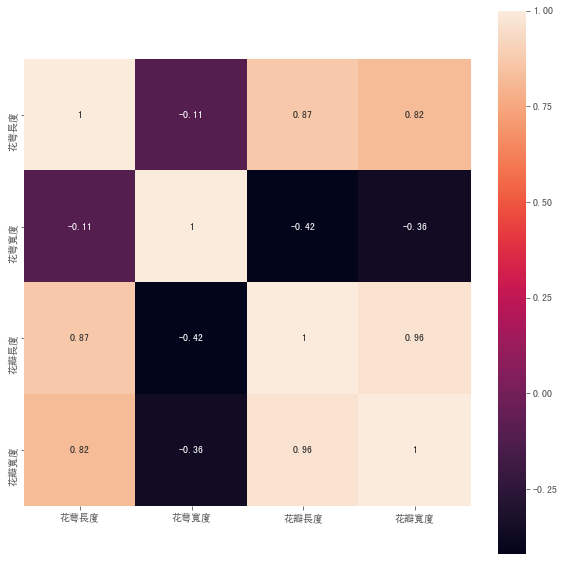

In [5]:
import seaborn as sns
plt.rcParams['font.family']='SimHei' #顯示中文
plt.figure(figsize=(10,10))
sns.heatmap(corr, square=True, annot=True)
plt.show()

## 2-2.散佈圖矩陣

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a173732e8>,
      dtype=object)

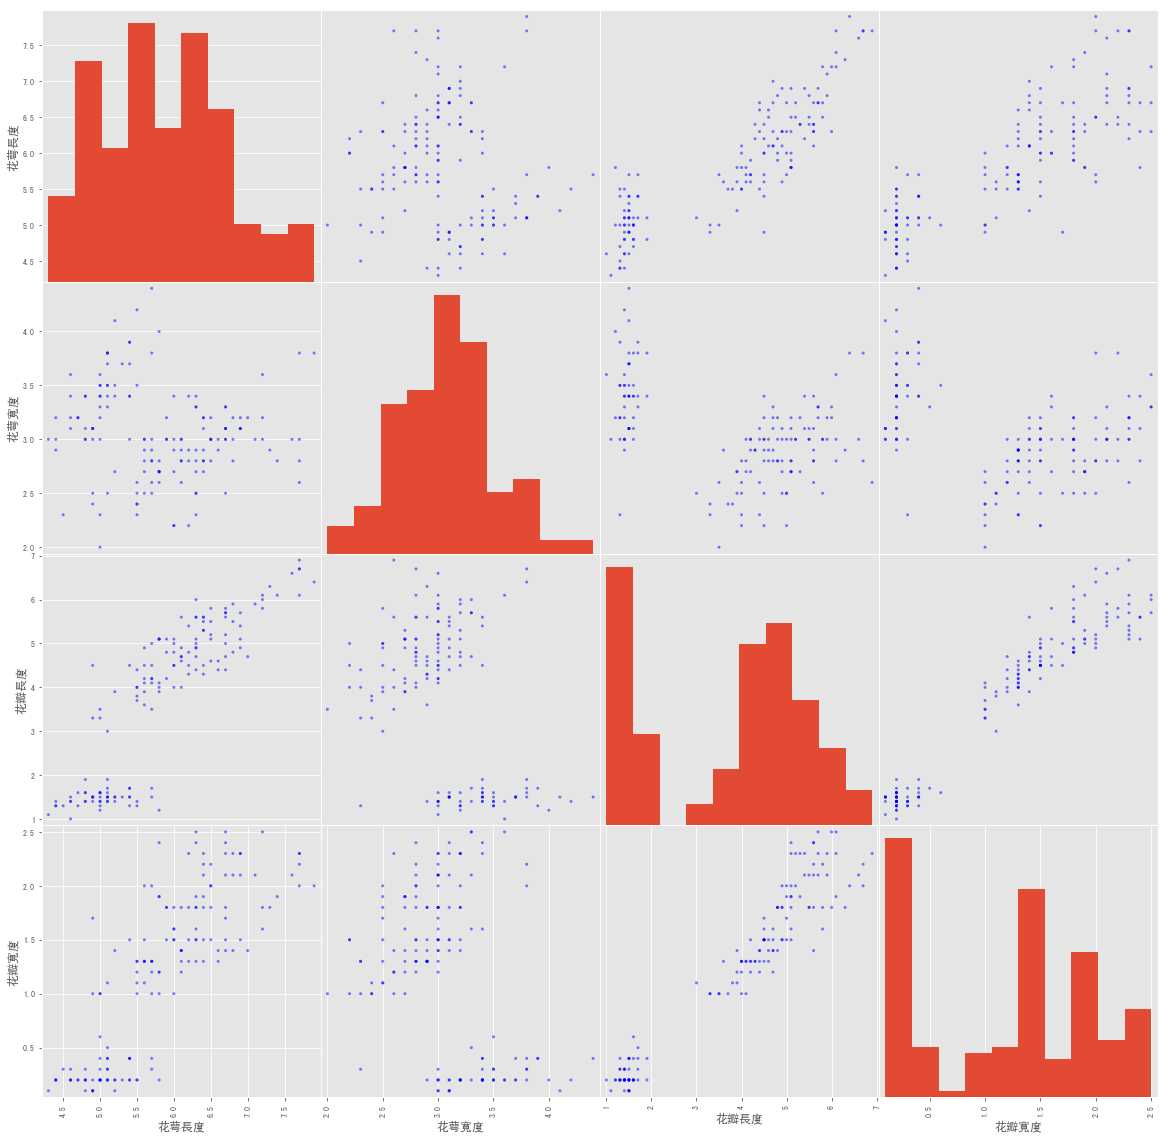

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[['花萼長度','花萼寬度','花瓣長度','花瓣寬度']],figsize=(20, 20),color='b')

# 3.資料預處理 - 機器學習

## 3-1.切分訓練及測試資料 

In [7]:
from sklearn.model_selection import train_test_split

X = df[['花萼長度','花萼寬度','花瓣長度']]
y = df['屬種']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

## 3-2.標準化 

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_std = sc.transform(X)

## 3-3.產生高次方項 

In [9]:
from sklearn.preprocessing import PolynomialFeatures

quadratic = PolynomialFeatures(degree=2) #0~2次方

X_train_poly = quadratic.fit_transform(X_train_std)
X_test_poly = quadratic.fit_transform(X_test_std) 
X_poly = quadratic.fit_transform(X_std)

## 3-3.K折交叉驗證 (K-fold Cross-Validation) + 學習曲線 (Learning Curve) 

In [10]:
# Scikit-Learn 官網作圖函式
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10,6))  #調整作圖大小
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment


# 4.使用分類演算法進行專題分析

# 5.KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=5, weights='distance') #k, weight (uniform, distance)
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

## 5-1.準確度 & 混淆矩陣

In [12]:
print(metrics.classification_report(y_test, knn.predict(X_test_std)))
print(metrics.confusion_matrix(y_test, knn.predict(X_test_std),
                               labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.94      0.75      0.83        20
 Iris-virginica       0.58      0.88      0.70         8

    avg / total       0.90      0.87      0.87        45

[[17  0  0]
 [ 0 15  5]
 [ 0  1  7]]


## 5-2.視覺化混淆矩陣函式（from scikit-learn官網） 

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#Source code from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

Confusion matrix, without normalization
[[17  0  0]
 [ 0 15  5]
 [ 0  1  7]]


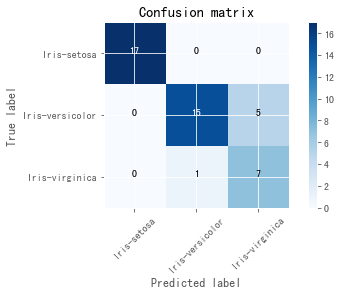

In [14]:
cnf_matrix = metrics.confusion_matrix(y_test, knn.predict(X_test_std))
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

plot_confusion_matrix(cnf_matrix, classes=target_names) #注意：targeet_names必須和confusion_matrix中labels的順序一致
plt.show()

## 5-3.K折交叉驗證 (K-fold Cross-Validation) + 學習曲線 (Learning Curve)

<module 'matplotlib.pyplot' from '/Users/anna/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

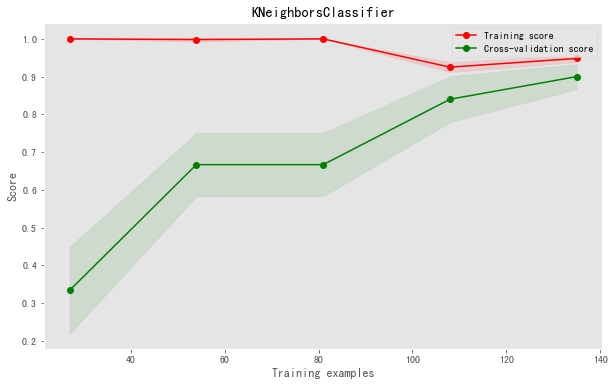

In [15]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = KNeighborsClassifier()

plot_learning_curve(estimator, "KNeighborsClassifier", X_std, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

# 6.決策分類樹

In [29]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini',max_depth=5)#可調整Gini或Entropy，決策樹可不用做資料標準化
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", feature_names=['花萼長度','花萼寬度','花瓣長度'],
                class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'],)

## 6-1.產生決策樹的圖片

In [31]:
!dot -Tpng tree.dot -o tree.png

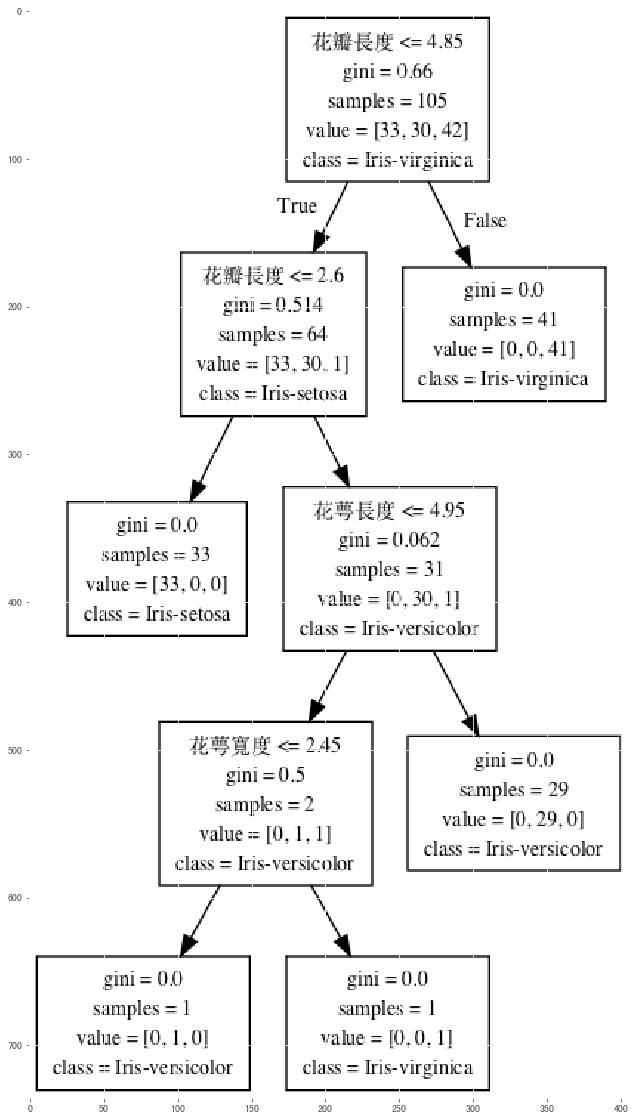

In [32]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline
img = mpimg.imread('tree.png')
fig = plt.figure(figsize=(18,20))
plt.imshow(img)

## 6-2.準確度預測

In [34]:
print(metrics.classification_report(y_test, tree.predict(X_test)))
print(metrics.confusion_matrix(y_test, tree.predict(X_test),labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.89      0.80      0.84        20
 Iris-virginica       0.60      0.75      0.67         8

    avg / total       0.88      0.87      0.87        45

[[17  0  0]
 [ 0 16  4]
 [ 0  2  6]]


## 6-3.特徵重要性

In [35]:
tree.feature_importances_.tolist()
df = pd.DataFrame({'feature':['花萼長度','花萼寬度','花瓣長度'],'feature_importance':tree.feature_importances_.tolist()})
df = df.sort_values(by=['feature_importance'],ascending=False).reset_index(drop=True)
df

,feature,feature_importance
0,花瓣長度,0.972054
1,花萼寬度,0.014439
2,花萼長度,0.013507


In [36]:
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.02*height, '%f'%float(height),
                ha='center', va='bottom')

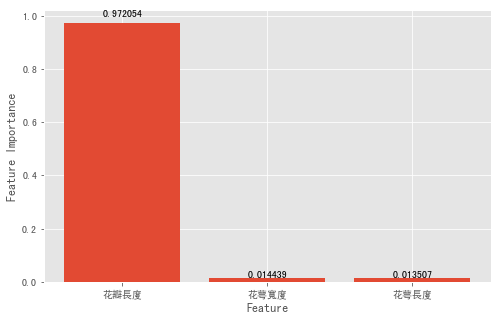

In [37]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig = plt.figure(figsize=(8,5))
plt.rcParams['font.family']='SimHei'

gini = plt.bar(df.index,df['feature_importance'],align='center')
plt.xlabel('Feature') #X軸名稱
plt.ylabel('Feature Importance') #Y軸名稱
plt.xticks(df.index, df['feature']) #X軸項目名稱

autolabel(gini)

plt.show()

## 6-4.K折交叉驗證 (K-fold Cross-Validation) + 學習曲線 (Learning Curve)

<module 'matplotlib.pyplot' from '/Users/anna/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

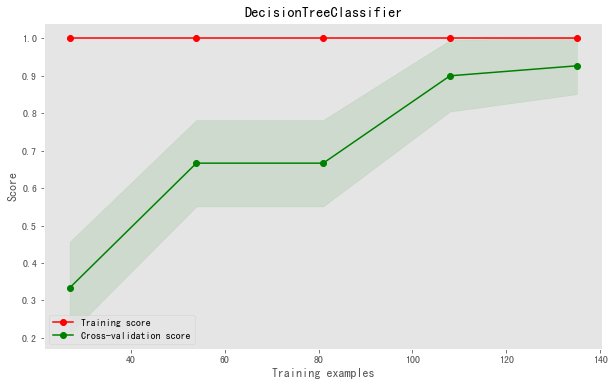

In [38]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = DecisionTreeClassifier()

plot_learning_curve(estimator, "DecisionTreeClassifier", X_std, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

# 7.SVM

In [39]:
from sklearn.svm import SVC

svc = SVC(C=1.0, kernel="rbf",max_iter=100) #可調整kernel、C值
svc.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=100, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
print(metrics.classification_report(y_test, svc.predict(X_test_std)))
print(metrics.confusion_matrix(y_test, svc.predict(X_test_std),labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.94      0.80      0.86        20
 Iris-virginica       0.64      0.88      0.74         8

    avg / total       0.91      0.89      0.89        45

[[17  0  0]
 [ 0 16  4]
 [ 0  1  7]]


# 7.貝式分類器

In [41]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_std, y_train)

GaussianNB(priors=None)

In [42]:
print(metrics.classification_report(y_test, gnb.predict(X_test_std)))
print(metrics.confusion_matrix(y_test, gnb.predict(X_test_std),labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.84      0.80      0.82        20
 Iris-virginica       0.56      0.62      0.59         8

    avg / total       0.85      0.84      0.85        45

[[17  0  0]
 [ 0 16  4]
 [ 0  3  5]]


## 結論

1.依據預測結果：SVM的預測較為高

2.依據決策樹所歸納的特徵重要性可得知花瓣長度為最顯著的特徵,可有效預測97%的準確度